## Exploratory data analysis
After the data cleaning step to put the data in the right format, it is time to explore the data to find any pattern and trend. 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [308]:
# Read in the data in the previous step
df = pd.read_pickle(r'..\data\processed\data_clean.pkl')
df.head()

,project_title,project_description,area_primary,discipline_primary,approval_date,lead_research_institution,city,ontario_commitment,total_project_costs,keyword,year,month
0,density matrix renormalization group simulatio...,proposed infrastructure to consist of a comput...,763,12300.0,2005-10-24,university of windsor,windsor,50000,175708,density matrix renormalization group numerical...,2005,10
1,adolescent depressive vulnerability through th...,the proposed infrastructure consisting of onsi...,4,15100.0,2005-07-22,university of toronto,toronto,59422,148557,depression adolescence cognitive vulnerability...,2005,7
2,autonomic computing laboratory,autonomic computing laboratory will enable res...,25,11800.0,2005-10-24,university of toronto,toronto,292551,731377,scaling availability adaptive selfmanaging sel...,2005,10
3,laboratory for forest genomics,the proposed facility will enable the examina...,63,14400.0,2005-07-22,university of toronto,toronto,200000,500000,comparative functional genomics molecular biol...,2005,7
4,stoe ipds diffractometer stateoftheart image ...,researchers at mcmaster university intend to u...,76,13000.0,2006-12-21,mcmaster university,hamilton,100000,261369,magnetocaloric materials for magnetic refriger...,2006,12


In [10]:
# sort the data base on date
df = df.sort_values(by="approval_date")
df

,project_title,project_description,area_primary,discipline_primary,approval_date,lead_research_institution,city,ontario_commitment,total_project_costs,keyword,year,month
312,biological microbeam for low dose radiobiology...,the proposed research is at the international ...,77,21300.0,2004-12-16,mcmaster university,hamilton,145990,1174624,microbeam singleion irradiatoraccelerator low ...,2004,12
268,mobile laboratories for clinical behavioural a...,the project will establish a unique capability...,43,40800.0,2004-12-16,queens university,kingston,357063,2871206,autism spectrum disorders genetics subgrouping...,2004,12
267,lifespan development research centre,this ambitious well designed innovative propos...,10,22100.0,2004-12-16,brock university,stcatharines,809160,6513952,behavioural and social sciences psychology neu...,2004,12
179,sharcnet 2 expansion of existing grid,the shared hierarchical academic research comp...,7,5000.0,2004-12-16,the university of western ontario,london,4297250,35606145,high performance computing computational physi...,2004,12
180,sharcnet 2 new partners and networking,the project will establish resources for new p...,7,99998.0,2004-12-16,the university of western ontario,london,1711439,13809576,NaN,2004,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3102,the development and application of genomic too...,this research program will harness genomic tec...,3,5000.0,2021-12-17,university of ottawa,ottawa,320000,862516,na,2021,12
3091,holistic analysis of plastic additives as envi...,dr roxanna suehring will build an analytical p...,34,12900.0,2021-12-17,ryerson university,toronto,75990,200481,na,2021,12
3132,lambton water centre,through this orf request lambton college will ...,NaN,NaN,2022-03-01,lambton college,sarnia,597715,1494288,water wastewater water chemisty culturing pilo...,2022,3
3131,niagara college nextgen greenhouse excellence,niagara college looks to expand upon strategic...,NaN,NaN,2022-03-01,niagara college,niaraga on the lake,892391,7422302,greenhouse technology cannabis biocontrols gro...,2022,3


# Graphs

<ipython-input-11-5b59803d71ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['year'])['ontario_commitment','total_project_costs'].sum().plot()


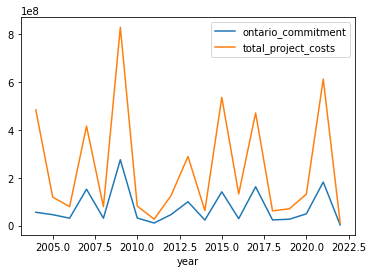

In [11]:
df.groupby(['year'])['ontario_commitment','total_project_costs'].sum().plot()


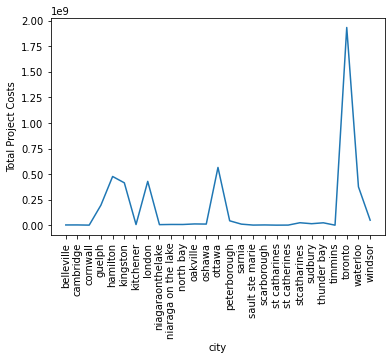

In [57]:

fig,ax=plt.subplots()
df.groupby(['city'])['total_project_costs'].sum().plot()
ax.set_xticks(np.arange(len(df.groupby(['city'])['total_project_costs'].sum().index)))
ax.set_xticklabels(df.groupby(['city'])['total_project_costs'].sum().index,rotation=90)
ax.set_ylabel("Total Project Costs")
plt.show()

In [54]:
len(df.groupby(['city'])['total_project_costs'].sum().index)

27

In [16]:
df['city'].unique()

array(['hamilton', 'kingston', 'stcatharines', 'london', 'toronto',
       'thunder bay', 'peterborough', 'windsor', 'ottawa', 'guelph',
       'waterloo', 'sault ste marie', 'sudbury', 'oshawa', 'north bay',
       'niagaraonthelake', 'cornwall', 'oakville', 'kitchener', 'sarnia',
       'scarborough', 'timmins', 'belleville', 'cambridge',
       'st catharines', 'st catherines', nan, 'niaraga on the lake'],
      dtype=object)

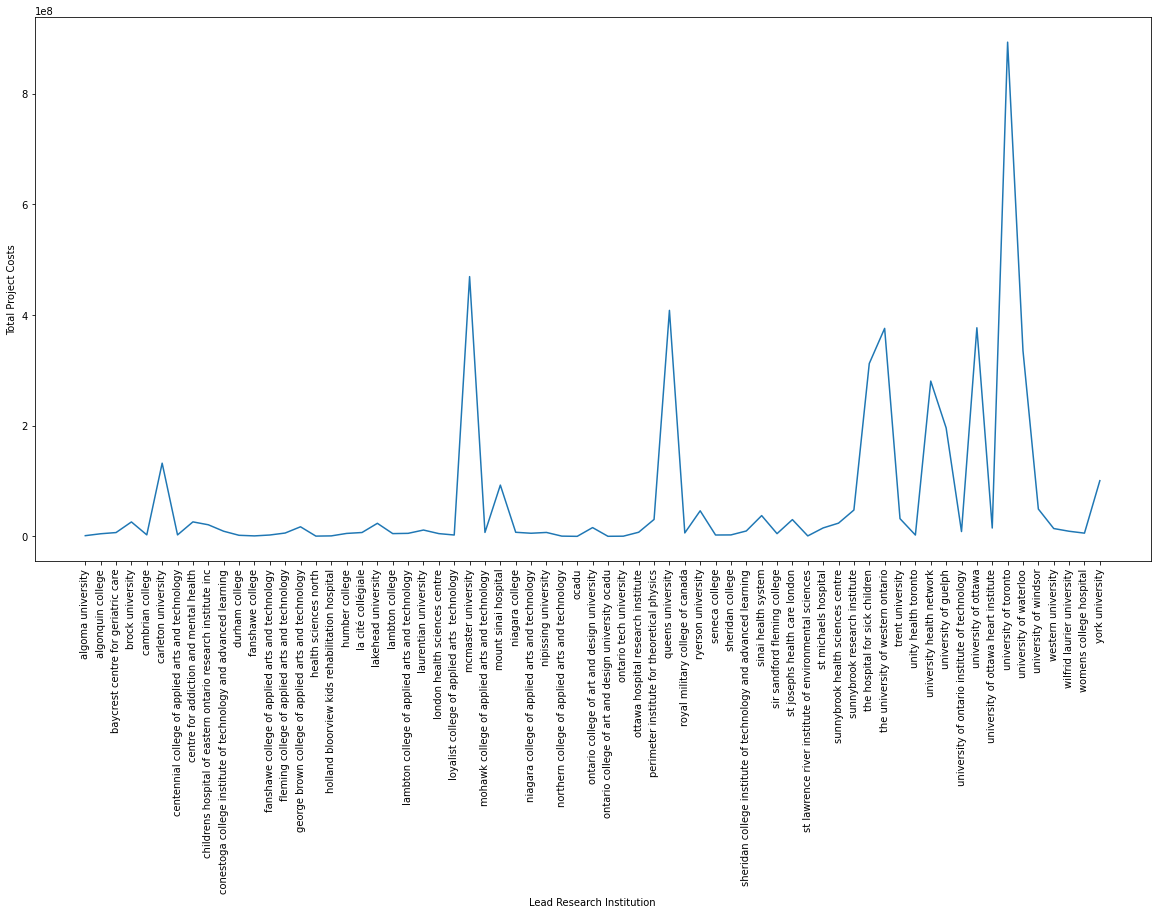

In [313]:
fig,ax=plt.subplots(figsize=(20,10))

df.groupby(['lead_research_institution'])['total_project_costs'].sum().plot()
#plt.tick_params(which='minor', labelsize=__)
ax.set_xticks(np.arange(len(df.groupby(['lead_research_institution'])['total_project_costs'].sum().index)))
ax.set_xticklabels(df.groupby(['lead_research_institution'])['total_project_costs'].sum().index,rotation=90)

#ax.set_xticklabels(df.lead_research_institution,rotation=90)
ax.set_ylabel("Total Project Costs")
ax.set_xlabel("Lead Research Institution")
plt.show()

In [66]:
np.arange(len(df.groupby(['lead_research_institution'])['total_project_costs'].sum().index))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [73]:
df.groupby(['lead_research_institution'])['total_project_costs'].count().tail(30)

lead_research_institution
perimeter institute for theoretical physics                         1
queens university                                                 250
royal military college of canada                                    8
ryerson university                                                 65
seneca college                                                      1
sheridan college                                                    1
sheridan college institute of technology and advanced learning      3
sinai health system                                                 9
sir sandford fleming college                                        2
st josephs health care london                                       2
st lawrence river institute of environmental sciences               1
st michaels hospital                                               14
sunnybrook health sciences centre                                   2
sunnybrook research institute                                   

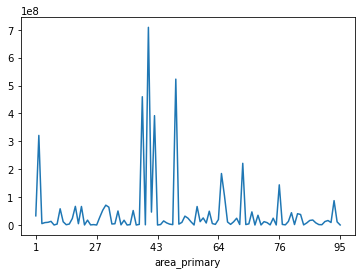

In [71]:
df.groupby(['area_primary'])['total_project_costs'].sum().plot()

In [74]:
df.groupby(['area_primary'])['total_project_costs'].count()

area_primary
1      16
10    166
11      9
12      3
13     10
     ... 
88     36
9       3
91     29
92      6
95      1
Name: total_project_costs, Length: 101, dtype: int64

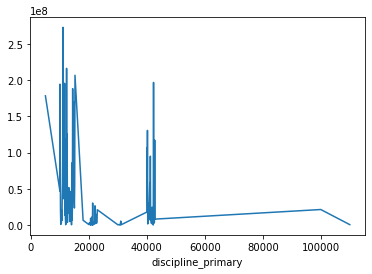

In [75]:
df.groupby(['discipline_primary'])['total_project_costs'].sum().plot()

In [76]:
df.groupby(['discipline_primary'])['total_project_costs'].count()

discipline_primary
5000.0      28
10000.0     16
10001.0     26
10100.0     59
10200.0     15
            ..
42600.0      8
42700.0     26
42800.0     13
99998.0      7
110000.0     1
Name: total_project_costs, Length: 123, dtype: int64

In [77]:
df.groupby(['discipline_primary'])['total_project_costs'].sum()


discipline_primary
5000.0      178267934
10000.0      46811163
10001.0     194286999
10100.0      97288953
10200.0      20487662
              ...    
42600.0       3597723
42700.0     117169557
42800.0       8181836
99998.0      21408865
110000.0       544070
Name: total_project_costs, Length: 123, dtype: int32

In [84]:
df['project_title'][0]

'density matrix renormalization group simulations of systems in condensed matter physics and quantum chemistry'

# Tokens

In [124]:
tokens=df['project_title'][0].split()


In [134]:
tokens=[]
for text in df['project_title']:
    tokens.append(list(set(text.split())))

In [135]:
len(tokens)

3134

In [138]:
tokens[3130:3134]

[['environmental',
  'holistic',
  'contaminants',
  'plastic',
  'of',
  'as',
  'analysis',
  'additives'],
 ['lambton', 'centre', 'water'],
 ['greenhouse', 'excellence', 'college', 'nextgen', 'niagara'],
 ['cambrian', 'college']]

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
vectorizer = TfidfVectorizer(min_df=2)

In [238]:
tfidf = vectorizer.fit_transform(df['project_title'])

In [281]:
a=vectorizer.vocabulary_  # converting words to numbers
a.get(3133)
a

{'biological': 217,
 'microbeam': 1149,
 'for': 746,
 'low': 1073,
 'dose': 552,
 'radiobiology': 1546,
 'research': 1611,
 'mobile': 1187,
 'laboratories': 1018,
 'clinical': 352,
 'behavioural': 189,
 'and': 87,
 'genetic': 784,
 'of': 1326,
 'families': 706,
 'with': 2032,
 'autism': 160,
 'spectrum': 1759,
 'disorders': 539,
 'developmental': 510,
 'lifespan': 1046,
 'development': 509,
 'centre': 312,
 'sharcnet': 1704,
 'expansion': 680,
 'existing': 676,
 'grid': 816,
 'new': 1296,
 'partners': 1380,
 'networking': 1272,
 'scanning': 1661,
 'probe': 1491,
 'facilities': 698,
 'nanoscale': 1256,
 'mechanical': 1112,
 'electrical': 593,
 'studies': 1796,
 'materials': 1100,
 'interfaces': 973,
 'the': 1864,
 'polar': 1455,
 'environment': 639,
 'atmospheric': 148,
 'laboratory': 1019,
 'at': 144,
 'three': 1877,
 'project': 1506,
 'testing': 1861,
 'fullscale': 763,
 'to': 1886,
 'using': 1970,
 'realistic': 1559,
 'extreme': 693,
 'environmental': 640,
 'loads': 1063,
 'canadian'

In [275]:
keys=list(a.keys())
values=list(a.values())

In [276]:
values.index(369)

1818

In [277]:
keys[1818]

'college'

In [246]:
len(vectorizer.vocabulary_)

2048

In [248]:
print(tfidf) 

  (0, 1611)	0.177016159658458
  (0, 1546)	0.4814724882641371
  (0, 552)	0.4814724882641371
  (0, 1073)	0.3840225034826804
  (0, 746)	0.11251244527772755
  (0, 1149)	0.4814724882641371
  (0, 217)	0.3362821357588203
  (1, 510)	0.28416693553372074
  (1, 539)	0.2630218992732134
  (1, 1759)	0.3503009579270666
  (1, 160)	0.33176844929625976
  (1, 2032)	0.22576917419048156
  (1, 706)	0.36344998205769236
  (1, 1326)	0.09044510328905478
  (1, 784)	0.2511604755059299
  (1, 87)	0.15651342373516153
  (1, 189)	0.2630218992732134
  (1, 352)	0.27450867512155525
  (1, 1018)	0.34010178244206707
  (1, 1187)	0.2665395414342022
  (1, 746)	0.08493246699284583
  (2, 312)	0.44493622184870013
  (2, 509)	0.40584328795829827
  (2, 1046)	0.7343013302806044
  (2, 1611)	0.3132483686379495
  :	:
  (3129, 101)	0.3556351579291843
  (3129, 1635)	0.3523655774115289
  (3129, 871)	0.2572096132973142
  (3129, 1889)	0.2950806316520439
  (3129, 833)	0.2307019980625796
  (3129, 789)	0.34927281955781975
  (3129, 1886)	0.18037

In [288]:
tfidf.nonzero()[1]

array([1611, 1546,  552, ...,  815,  673,  369], dtype=int32)

In [302]:
tfidf[3132,673]

0.43340069424363553

In [240]:
#fit change and fit the model
#transform just return the value of known model
type(tfidf)

scipy.sparse.csr.csr_matrix

In [168]:
tfidf=tfidf.toarray()
type(tfidf)

numpy.ndarray

In [242]:
tfidf.shape

(3134, 2048)

In [243]:
words=vectorizer.get_feature_names()

In [284]:
len(words)

2048

In [293]:
for col in tfidf.nonzero()[1]:
    if tfidf[0,col] > 0.3:
        print (words[col], '-', tfidf[0,col])

radiobiology - 0.4814724882641371
dose - 0.4814724882641371
low - 0.3840225034826804
microbeam - 0.4814724882641371
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
low - 0.3840225034826804
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
low - 0.3840225034826804
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
low - 0.3840225034826804
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
biological - 0.3362821357588203
low - 0.3840225034826804
biological - 0.3362821357588203
low - 0.3840225034826804
biological - 0.33628213

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

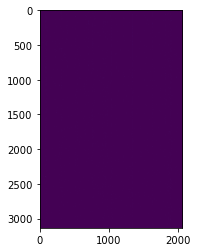

In [182]:
plt.figure(figsize=(20,4))
_=plt.imshow(tfidf)

In [186]:
np.nonzero(tfidf)

(array([   0,    0,    0, ..., 3132, 3132, 3133], dtype=int64),
 array([ 217,  552,  746, ..., 1298, 1300,  369], dtype=int64))

# Group project based on low or high total project costs

In [192]:
df.total_project_costs.min(),df.total_project_costs.max(),df.total_project_costs.mean()

(11852, 58435136, 1473472.2000638163)

In [195]:
df['total_project_costs'] > df.total_project_costs.mean()

312     False
268      True
267      True
179      True
180      True
        ...  
3102    False
3091    False
3132     True
3131     True
3133     True
Name: total_project_costs, Length: 3134, dtype: bool

In [198]:
df["y"] = (df['total_project_costs'] > df.total_project_costs.mean()).astype(int)

# Model

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
x=tfidf
y=df['y']

In [202]:
x_train,x_test,y_train,y_test =train_test_split(x,y)

In [203]:
len(x_train),len(x_test)

(2350, 784)

In [208]:
x_train.shape,y_train.shape

((2350, 2048), (2350,))

In [209]:
from sklearn.linear_model import LogisticRegression

In [211]:
model = LogisticRegression()

In [212]:
model.fit(x_train,y_train)

LogisticRegression()

In [305]:
model.predict_proba(x_test)

array([[0.94442529, 0.05557471],
       [0.89318152, 0.10681848],
       [0.79093899, 0.20906101],
       ...,
       [0.87854455, 0.12145545],
       [0.89583721, 0.10416279],
       [0.85442332, 0.14557668]])

In [306]:
y

312     0
268     1
267     1
179     1
180     1
       ..
3102    0
3091    0
3132    1
3131    1
3133    1
Name: y, Length: 3134, dtype: int32

In [215]:
y_predict =[int(p[1] >0.5) for p in model.predict_proba(x_test)]

In [218]:
model.coef_

array([[-0.09669341,  0.21252943,  0.73956615, ..., -0.02728564,
        -0.30308129,  0.7743805 ]])

In [219]:
model.coef_.shape

(1, 2048)

In [220]:
coef = model.coef_.reshape(-1)

In [222]:
coef.shape

(2048,)

In [223]:
np.argmax(coef)

312

In [227]:
idx = np.argsort(coef)[-10:]

In [231]:
idx

array([ 648, 1264,  635, 1848, 1502,   43,  946,  278,  534,  312],
      dtype=int64)

In [229]:
words[312]

'centre'

In [232]:
words=np.array(words)

In [233]:
words[idx]

array(['epigenetics', 'national', 'enhancing', 'technologies', 'program',
       'advanced', 'innovation', 'canadian', 'disease', 'centre'],
      dtype='<U20')